<a href="https://colab.research.google.com/github/ecealptekin/Logistic-Regression-Naive-Bayesian/blob/master/Copy_of_HW3_Logistic_Regression_toSolve__2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, random_state=1)
data2, label2 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=5, random_state=1)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's split the datasets into train and test.

In [0]:
(train_x1, val_x1, train_y1, val_y1) = train_test_split(data1, label1, test_size=0.2)
(train_x2, val_x2, train_y2, val_y2) = train_test_split(data2, label2, test_size=0.2)

Plot the first dataset with standard deviation 1.

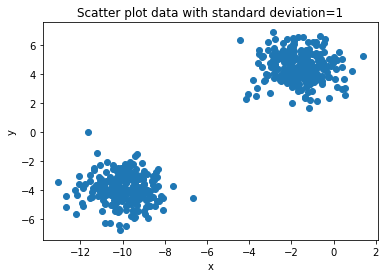

In [0]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 4.

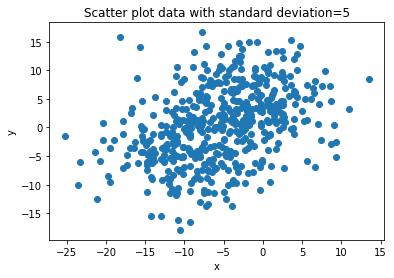

In [0]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [0]:
GNB = GaussianNB()
GNB.fit(train_x1, train_y1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x1, train_y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(val_x1),val_y1))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [0]:
print("Confusion Matrix:")
print(confusion_matrix(GNB.predict(val_x1),val_y1))

Confusion Matrix:
[[37  0]
 [ 0 63]]


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(val_x1), val_y1))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [0]:
print("Confusion Matrix:")
print(confusion_matrix(clf.predict(val_x1), val_y1))

Confusion Matrix:
[[37  0]
 [ 0 63]]


### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [0]:
GNB = GaussianNB()
GNB.fit(train_x2, train_y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x2, train_y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(val_x2),val_y2))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.93      0.91      0.92        45

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [0]:
print("Confusion Matrix:")
print(confusion_matrix(GNB.predict(val_x2),val_y2))

Confusion Matrix:
[[52  3]
 [ 4 41]]


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(val_x2), val_y2))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        56
           1       0.93      0.93      0.93        44

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [0]:
print("Confusion Matrix:")
print(confusion_matrix(clf.predict(val_x2), val_y2))

Confusion Matrix:
[[53  3]
 [ 3 41]]


### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

We obtained that the first data set is linear separable when standard deviation is 1. On the other hand, it is not linear separable for second data set when standard deviation is 5, when we draw the perfect decision boundaries. Linear separability is the fact that classes of patterns with n-dimensional vector can be separated with a single decision surface. 

The accuracy is the same for the first data set and equals to 1.00. The accuracy for Naive Bayesian of second data set is 0.93. The accuracy for logistic regression of second data set is 0.94. We conclude that logistic regression performs better. Since the second data set is not conditionally independent, logistic regression outperforms Naive Bayesian.

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
df=pd.read_json('/content/drive/My Drive/News_Category_Dataset_v2.json',lines=True)

## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [0]:
new_df['category'].value_counts()

POLITICS         8121
WELLNESS         4497
ENTERTAINMENT    4070
TRAVEL           2442
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

###Â Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words='english')
X_train_counts = count_vect.fit_transform(X)


TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

It is the unigrams.

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split

(train_data, val_data, train_label, val_label) = train_test_split(X_train_tf, y, test_size=0.2)

### Gaussian Naive Bayesian

In [0]:
GNB = GaussianNB()
GNB.fit(train_data.toarray(), train_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(val_data.toarray()), val_label))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1513
           1       0.71      0.71      0.71       937
           2       0.74      0.67      0.70       889
           3       0.59      0.57      0.58       487

    accuracy                           0.71      3826
   macro avg       0.70      0.69      0.69      3826
weighted avg       0.71      0.71      0.71      3826



In [0]:
print("Confusion Matrix:")
print(confusion_matrix(GNB.predict(val_data.toarray()), val_label))

Confusion Matrix:
[[1191  137  106   79]
 [ 145  667   47   78]
 [ 199   56  598   36]
 [  72   78   59  278]]


### 6) Logistic Regression

In [0]:
clf = LogisticRegression(random_state=0)
clf.fit(train_data.toarray(), train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(val_data.toarray()), val_label))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1698
           1       0.90      0.89      0.89       950
           2       0.87      0.86      0.86       816
           3       0.69      0.90      0.78       362

    accuracy                           0.89      3826
   macro avg       0.85      0.89      0.87      3826
weighted avg       0.90      0.89      0.89      3826



In [0]:
print("Confusion Matrix:")
print(confusion_matrix(clf.predict(val_data.toarray()), val_label))

Confusion Matrix:
[[1538   54   63   43]
 [  24  843   34   49]
 [  32   29  702   53]
 [  13   12   11  326]]


### Observe Logistic Regression is much slower but more accurate. Discuss.